In [54]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from scipy import stats


In [2]:
file_path = '/content/Dataset 1 _ Pima Indians diabetes dataset (PIDD).csv'
df = pd.read_csv(file_path)

In [3]:
df.replace(0, np.nan, inplace=True)

df.fillna(df.mean(), inplace=True)


In [4]:
df.head()

,Pregnancies,Glucose,Blood pressure,Skin thickness,Insulin,Body mass index,Diabetes pedigree function,Age,Outcome
0,6.000000,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1.0
1,1.000000,85.0,66.0,29.00000,155.548223,26.6,0.351,31,1.0
2,8.000000,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1.0
3,1.000000,89.0,66.0,23.00000,94.000000,28.1,0.167,21,1.0
4,4.494673,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1.0


In [6]:
df.isnull().sum()

Pregnancies                   0
Glucose                       0
Blood pressure                0
Skin thickness                0
Insulin                       0
Body mass index               0
Diabetes pedigree function    0
Age                           0
Outcome                       0
dtype: int64

In [8]:
df.shape

(768, 9)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Pregnancies                 768 non-null    float64
 1   Glucose                     768 non-null    float64
 2   Blood pressure              768 non-null    float64
 3   Skin thickness              768 non-null    float64
 4   Insulin                     768 non-null    float64
 5   Body mass index             768 non-null    float64
 6   Diabetes pedigree function  768 non-null    float64
 7   Age                         768 non-null    int64  
 8   Outcome                     768 non-null    float64
dtypes: float64(8), int64(1)
memory usage: 54.1 KB


In [58]:
def remove_outliers(data, columns):
    for column in columns:
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return data


In [59]:
columns_to_check = df.columns[:-1]  # Exclude the 'Outcome' column
df = remove_outliers(df, columns_to_check)

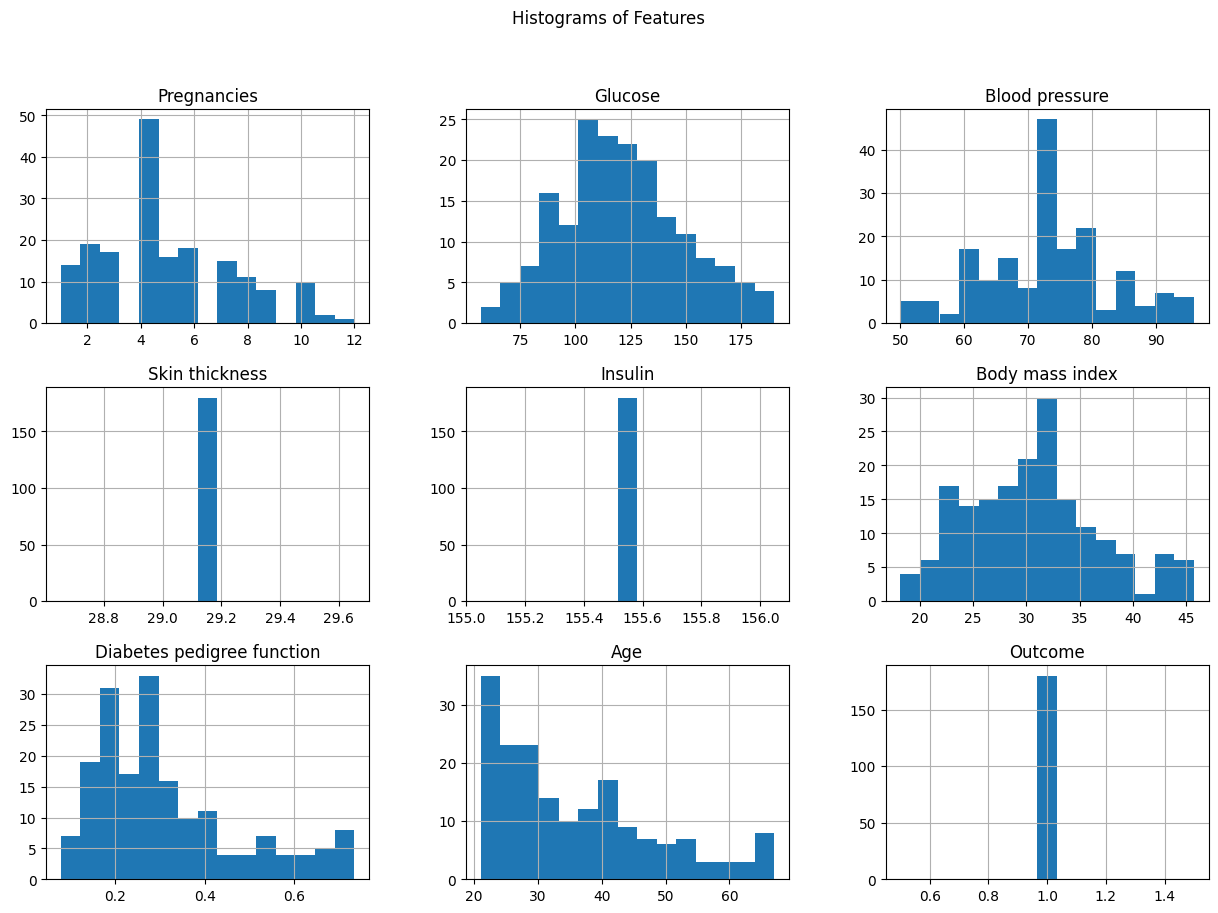

In [20]:

df.hist(bins=15, figsize=(15, 10), layout=(3, 3))
plt.suptitle('Histograms of Features')
plt.show()

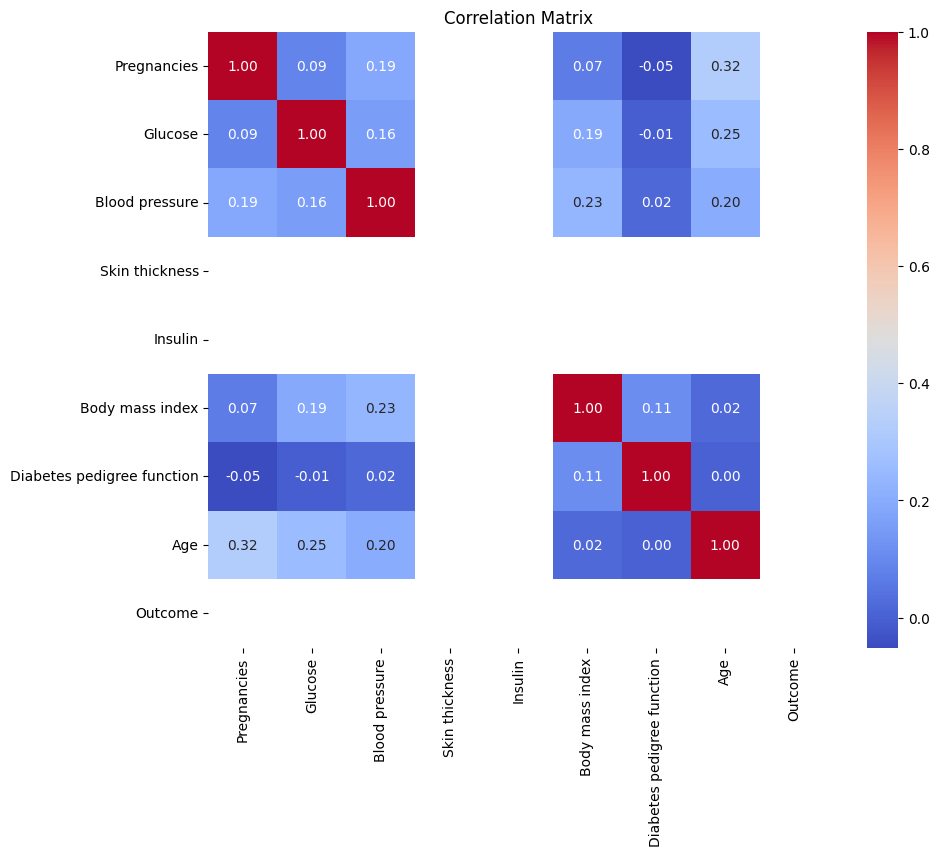

In [21]:
plt.figure(figsize=(10, 8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

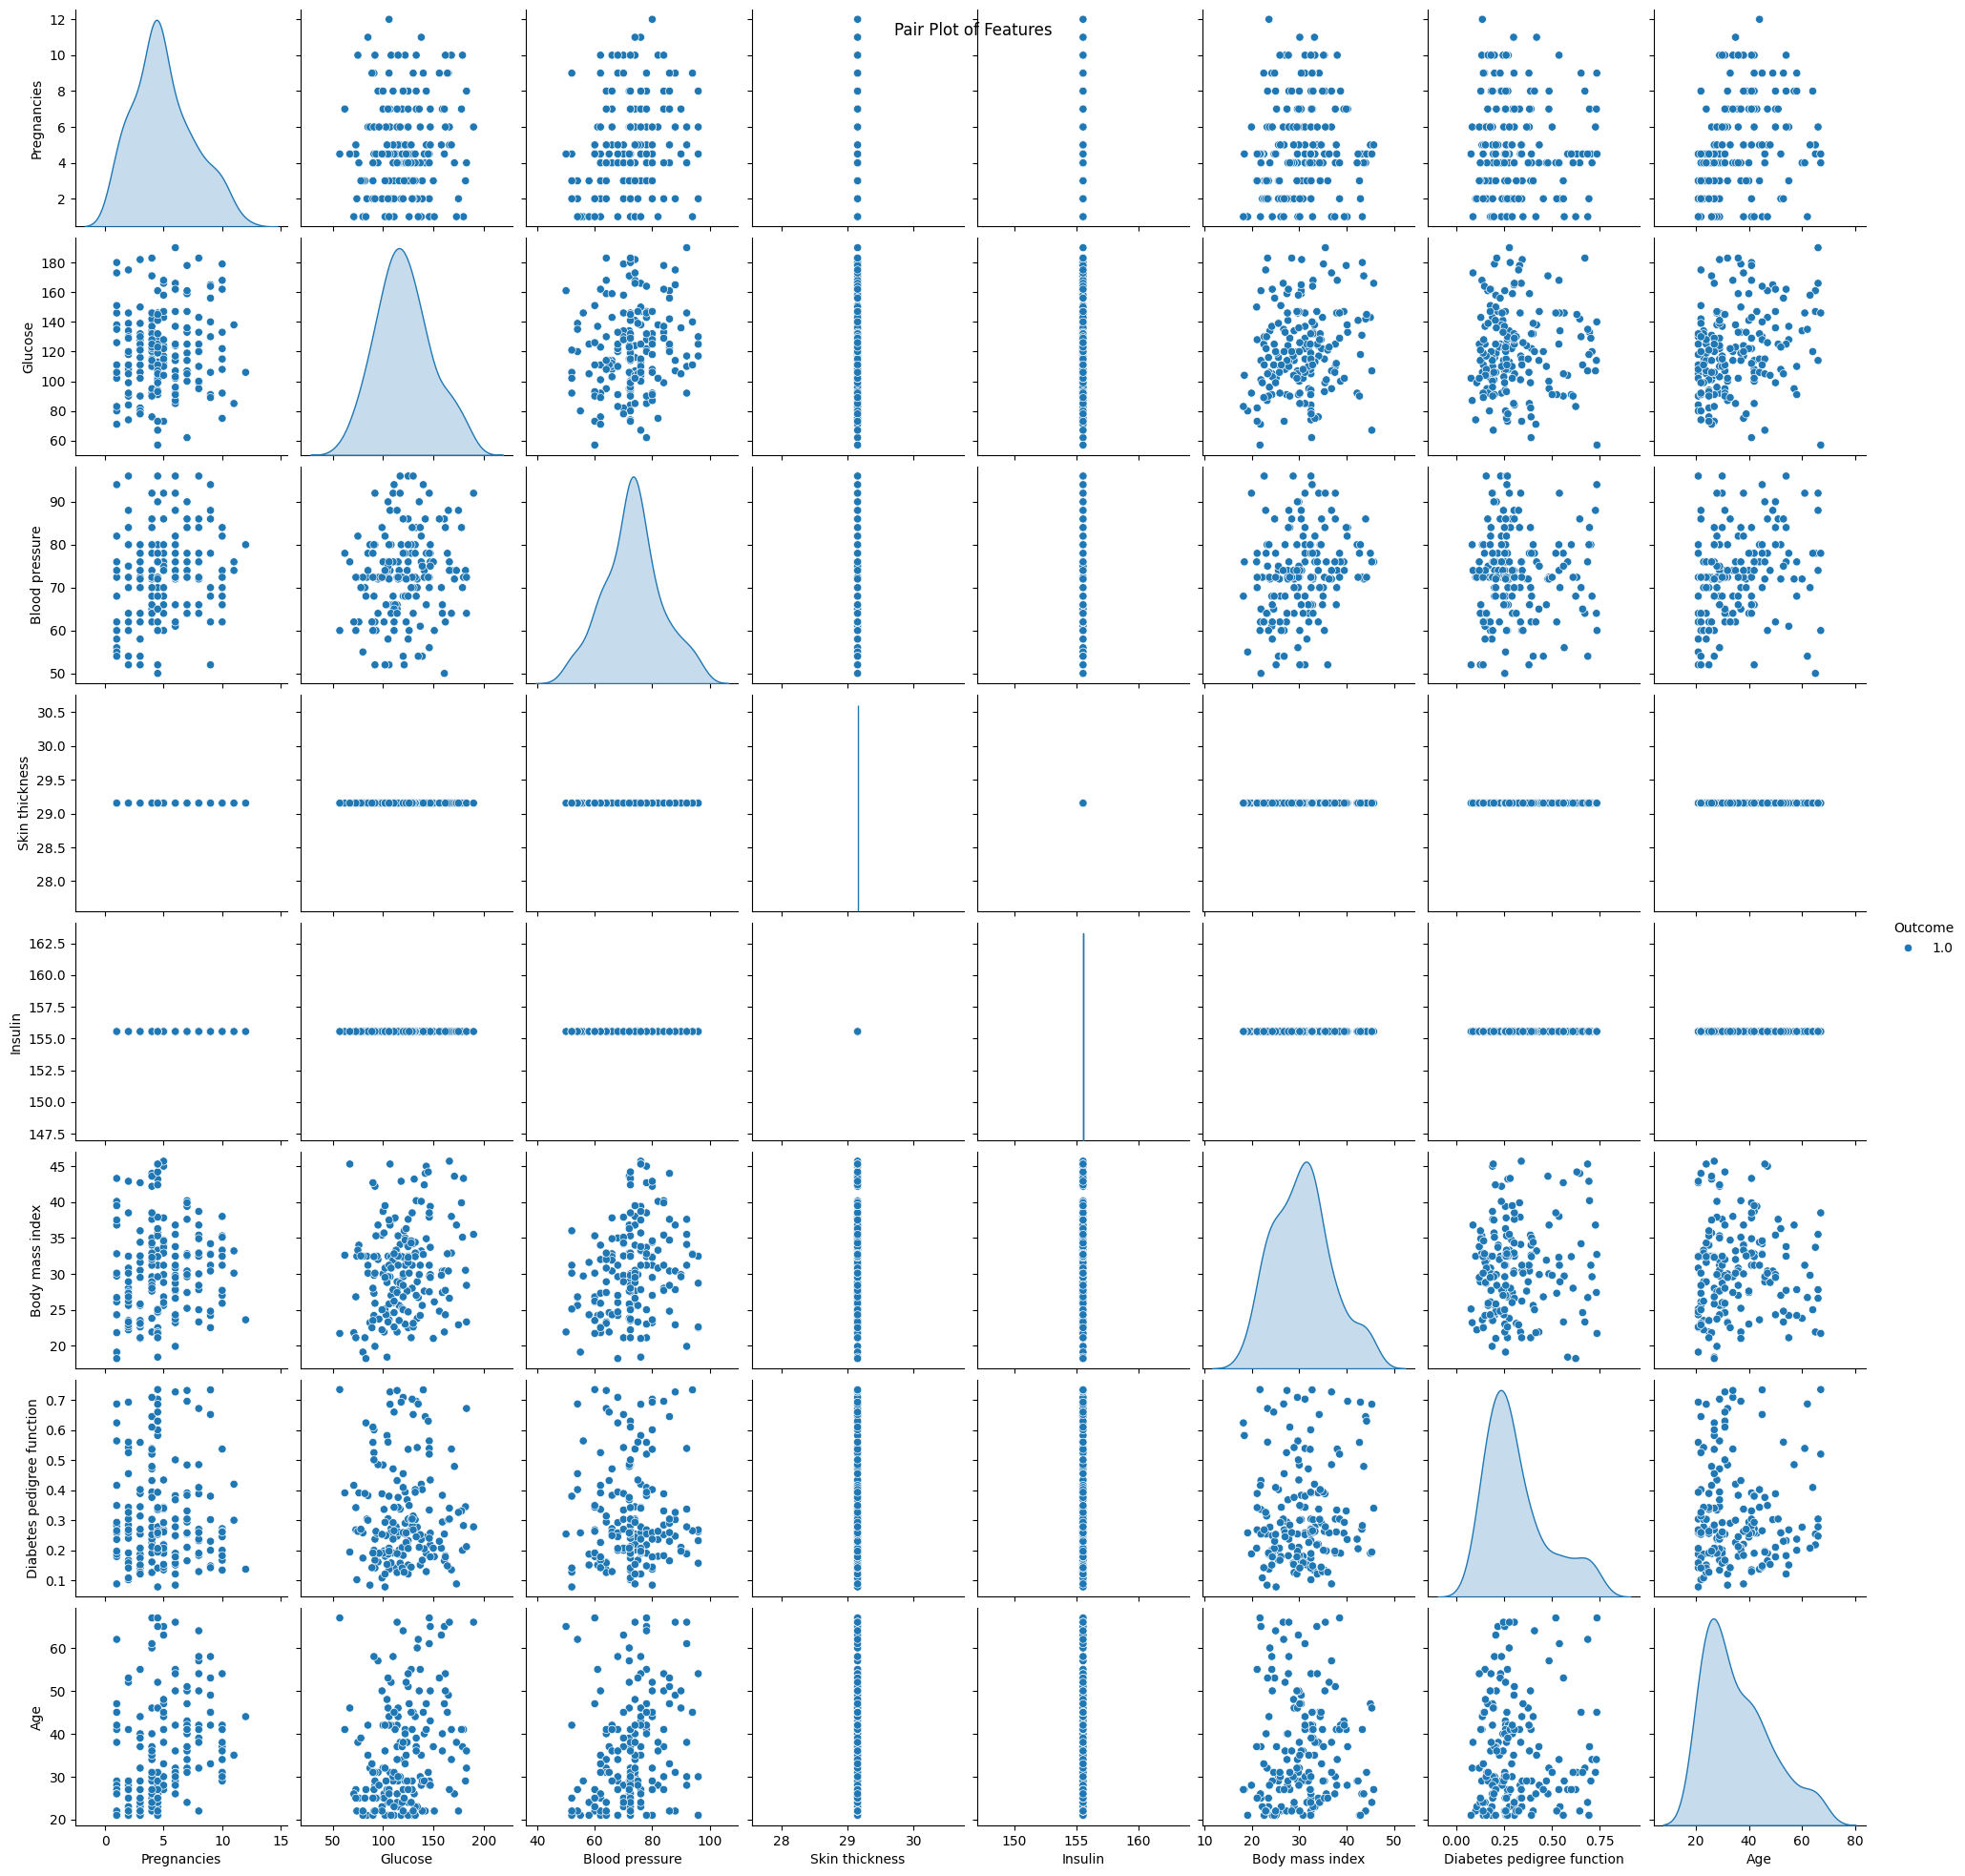

In [22]:
sns.pairplot(df, hue='Outcome')
plt.suptitle('Pair Plot of Features')
plt.show()

In [24]:

X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [33]:
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [26]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [36]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid,
                           cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 216 candidates, totalling 648 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             verbose=2)

In [37]:
best_params = grid_search.best_params_
print(f'Best parameters found: {best_params}')

Best parameters found: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


In [38]:
best_model = grid_search.best_estimator_
best_model.fit(X_train_scaled, y_train)

RandomForestClassifier(n_estimators=50, random_state=42)

In [39]:
y_pred = best_model.predict(X_test_scaled)

In [40]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [41]:
print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

Accuracy: 1.0
Confusion Matrix:
[[36]]
Classification Report:
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00        36

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36

